
# $\beta\beta$ offline signal reconstruction

In [1]:
# S2 signal script
import sys
sys.path.append('/home/investigator/mariandbt/python/notebooks/modules')
sys.path.append('/scratch/marian/python/notebooks/modules')

from import_modules import *
import set_up as setup
import s2_simulation as s2sim
from s2_simulation import unit


##  Data reading

In [2]:
# path = '/home/investigator/mariandbt/python/data'
path = '/scratch/marian/python/data'
path = path + '/s2simulation'

In [3]:
sns_path = os.path.join(path, "ie/20240405_Next100_ie_s2_1.next.h5")
s2_table_path = os.path.join(path, "s2tables/20240405_s2_table.h5")
# event_path = os.path.join(path, "bb/20240228_Next100_10ev_ELon_bb_1.next.h5") # 10 full bb w s2 (ONLY 90 SENSs)
# event_path = os.path.join(path, "bb/20240710_Next100_3ev_ELon_bb_1.next.h5") # 3 full bb w s2
event_path = os.path.join(path, "bb/20240712_Next100_10ev_ELon_bb_1.next.h5") # 10 full bb w s2

# event_path = os.path.join(path, "Kr/20240724_Next100_10ev_ELoff_Kr_1.next.h5") 
# event_path = os.path.join(path, "Kr/20240828_Next100_10ev_ELon_Kr_1.next.h5") 

In [4]:
event, sensor = 6, 202

/scratch/marian/python/notebooks/modules/set_up.py:48: IncompatibilityWarning: 
where criteria is being ignored as this version [0.0.0] is too old (or
not-defined), read the file in and write it out to a new file to upgrade (with
the copy_to method)

  sns_positions = pd.read_hdf(file_path, "/MC/sns_positions", where='sensor_name == F_SENSOR')


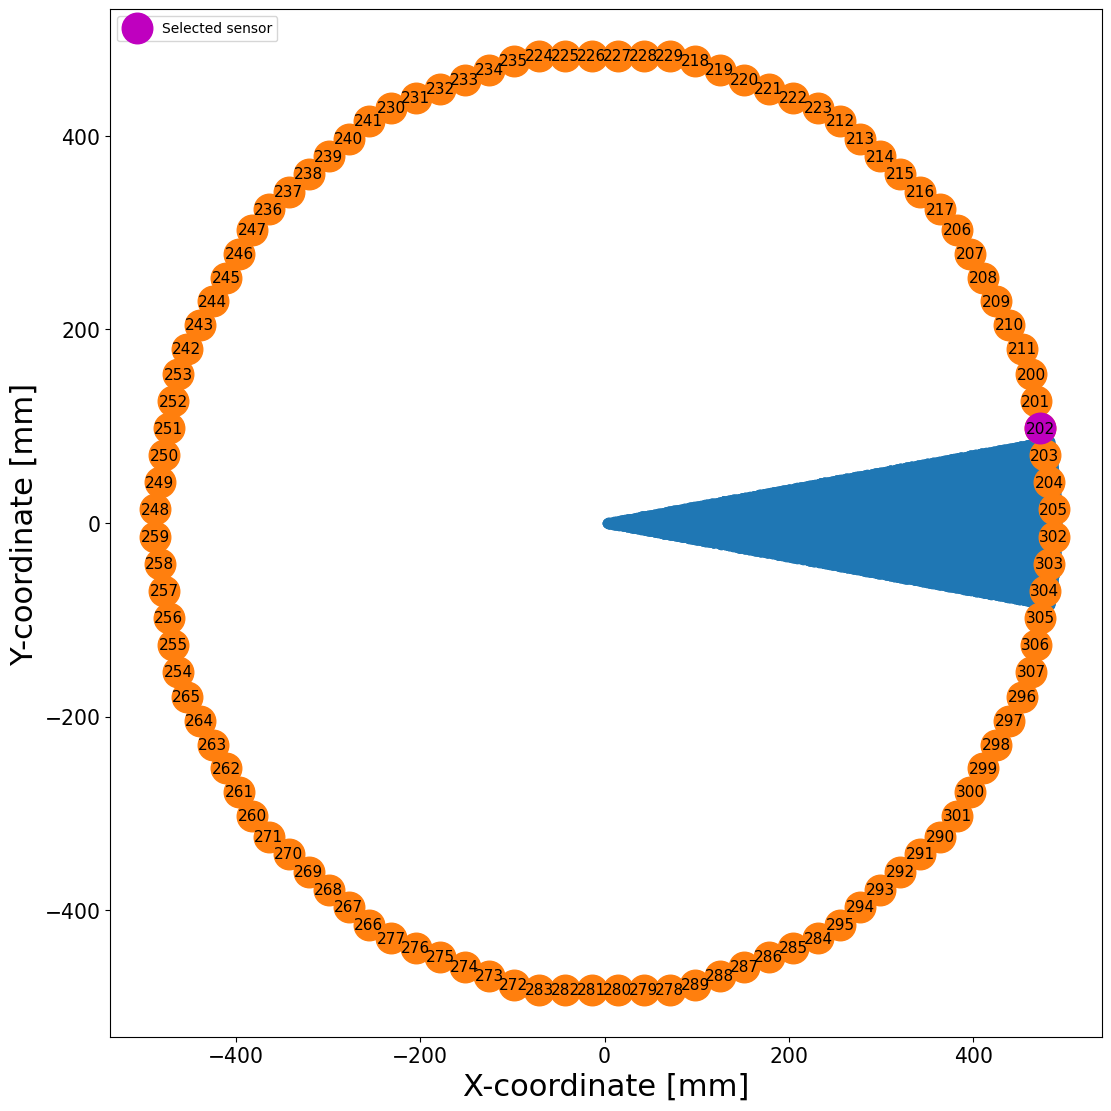

In [5]:
ax = setup.print_sens_geometry(sns_path, sensor)

# Access the figure through the ax object
fig = ax.figure
fig.set_size_inches(11, 11)  # Set new width and height in inches

ax.legend(loc= 'upper left')

In [6]:
# Create TPC
TPC     = s2sim.HPGXeTPC()
TPC.SetDefaults(sns_path)
TPC.SetRecombinationFactor(0)

Default parameters set succesfully :) TPC ready to use


/scratch/marian/python/notebooks/modules/set_up.py:48: IncompatibilityWarning: 
where criteria is being ignored as this version [0.0.0] is too old (or
not-defined), read the file in and write it out to a new file to upgrade (with
the copy_to method)

  sns_positions = pd.read_hdf(file_path, "/MC/sns_positions", where='sensor_name == F_SENSOR')


In [7]:
s2table = s2sim.s2Table(s2_table_path)

In [8]:
hits = pd.read_hdf(event_path, "/MC/hits")
hits = hits.query(f'event_id == {event}')

In [9]:
particles = pd.read_hdf(event_path, "/MC/particles")
particles = particles.query(f'event_id == {event}')

ie        = particles.query(f'particle_name == "ie-"')

/scratch/marian/python/notebooks/modules/set_up.py:48: IncompatibilityWarning: 
where criteria is being ignored as this version [0.0.0] is too old (or
not-defined), read the file in and write it out to a new file to upgrade (with
the copy_to method)

  sns_positions = pd.read_hdf(file_path, "/MC/sns_positions", where='sensor_name == F_SENSOR')


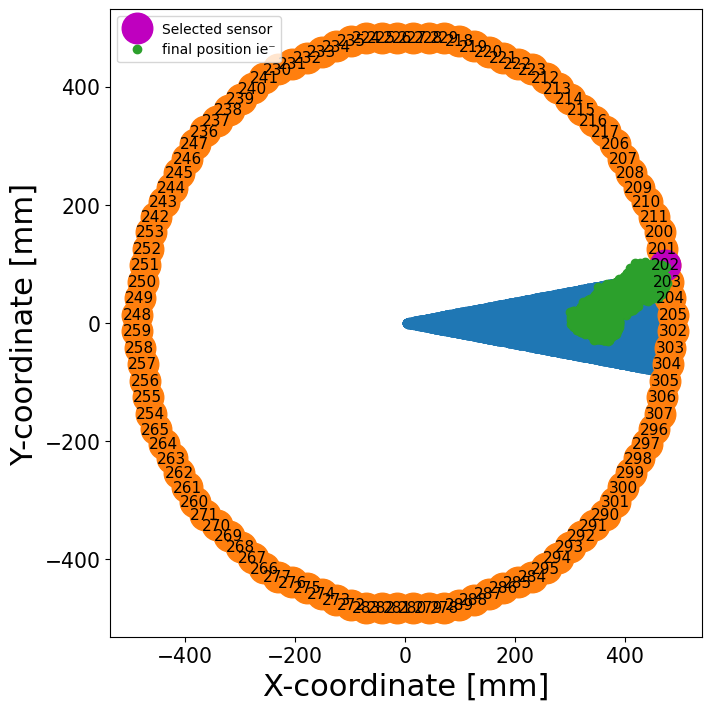

In [10]:
ax = setup.print_sens_geometry(sns_path, sensor)

ax.plot(ie.final_x, ie.final_y, 'o', label = 'final position ie⁻')
# ax.plot(prim_e.final_x, prim_e.final_y, 'o', label = 'final position e⁻')

# Access the figure through the ax object
fig = ax.figure

# Modify the size of the figure
fig.set_size_inches(7, 7)  # Set new width and height in inches

ax.legend(loc= 'upper left')

In [11]:
sns_positions, sns_response = setup.read_fiber_sens(event_path)
sns_response = sns_response.query(f'event_id == {event}')

/scratch/marian/python/notebooks/modules/set_up.py:48: IncompatibilityWarning: 
where criteria is being ignored as this version [0.0.0] is too old (or
not-defined), read the file in and write it out to a new file to upgrade (with
the copy_to method)

  sns_positions = pd.read_hdf(file_path, "/MC/sns_positions", where='sensor_name == F_SENSOR')


In [12]:
nexusEvent = s2sim.nexusEvent(event_path, event)
nexusEvent.AddDriftAndDiffusion(TPC)

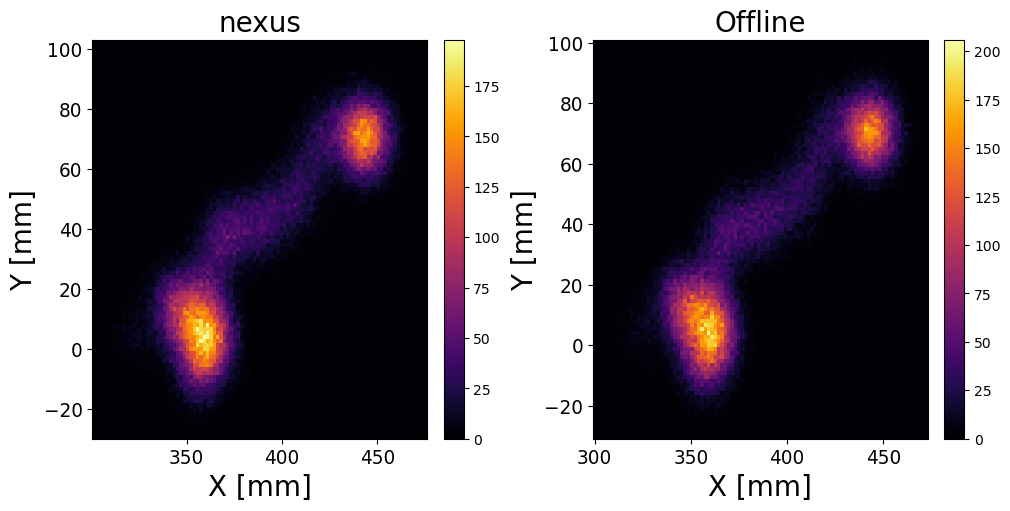

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, sharex=False, sharey=False)

font_size = 20

# nexus
_, _, _, figure_map = ax[0].hist2d(ie.final_x, 
                                   ie.final_y, 
                                   bins = 100, cmap='inferno', label = 'nexus');

fig.colorbar(figure_map, ax = ax[0]);
ax[0].set_title('nexus', fontsize = font_size)

# Offline simulation
_, _, _, figure_map = ax[1].hist2d(nexusEvent.ElectronsFinalX.magnitude, 
                                   nexusEvent.ElectronsFinalY.magnitude, 
                                   bins = 100, cmap='inferno', label = 'nexus');
fig.colorbar(figure_map, ax = ax[1]);
ax[1].set_title('Offline', fontsize = font_size)


for axis in ax:

    axis.set_xlabel('X [mm]', fontsize = font_size);
    axis.set_ylabel('Y [mm]', fontsize = font_size);
    axis.tick_params(axis='both', labelsize = font_size*2/3)

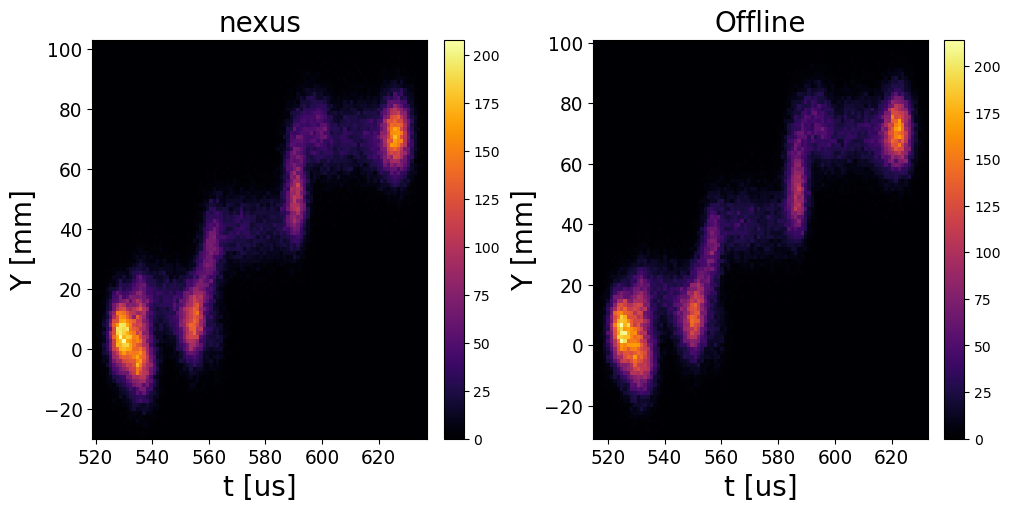

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, sharex=False, sharey=False)

font_size = 20

# nexus
nexus_t = ie.final_t*1e-3 # [us]
_, _, _, figure_map = ax[0].hist2d(nexus_t, 
                                   ie.final_y, 
                                   bins = 100, cmap='inferno', label = 'nexus');

fig.colorbar(figure_map, ax = ax[0]);
ax[0].set_title('nexus', fontsize = font_size)

# Offline simulation
_, _, _, figure_map = ax[1].hist2d(nexusEvent.ElectronsMeasurementTime.to(unit.us).magnitude, 
                                   nexusEvent.ElectronsFinalY.magnitude, 
                                   bins = 100, cmap='inferno', label = 'nexus');
fig.colorbar(figure_map, ax = ax[1]);
ax[1].set_title('Offline', fontsize = font_size)


for axis in ax:

    axis.set_xlabel('t [us]', fontsize = font_size);
    axis.set_ylabel('Y [mm]', fontsize = font_size);
    axis.tick_params(axis='both', labelsize = font_size*2/3)

In [15]:
# %%timeit # (~4mins) (~25s no sé why...)
s2signal = s2sim.s2Signal(s2table, TPC, nexusEvent)

In [16]:
online_signal = sns_response.query(f'sensor_id == {sensor}').copy()
t_binnin = 0.1 # [ns]
online_signal.time_bin = online_signal.time_bin*t_binnin # [ns]

In [17]:
nexus_t = online_signal.time_bin*1e-3 # [us]
nexus_s2 = online_signal.charge # [pes]

/tmp/ipykernel_992593/3487310581.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=legend.legendHandles, labels=new_labels);


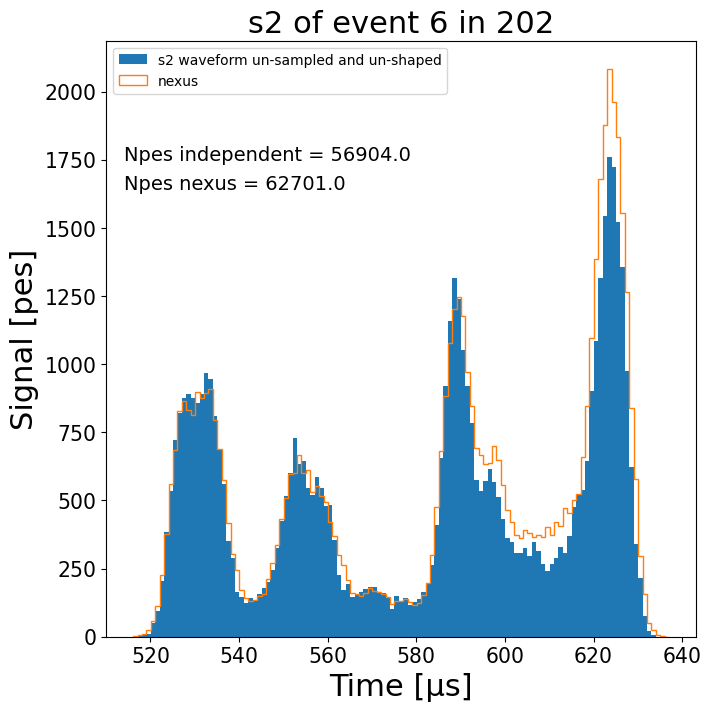

In [18]:
t, waveform, ax = s2signal.PrintWaveform(sensor, bin_width = 1*unit.us, shaped_and_sampled = False)


nexus_s2 = nexus_s2[nexus_t > 100] # exclude s1
nexus_t = nexus_t[nexus_t > 100] # exclude s1

# both histograms should have the same binning
bin_width   = 1 *unit.us # [us]
binin       = np.arange(t.magnitude.min() - bin_width.magnitude, t.magnitude.max() + 2*bin_width.magnitude, bin_width.magnitude)


events, bins, bars = ax.hist(nexus_t, binin,
                             weights = nexus_s2,
                             density=False,
                             histtype='step',
                             label = f'nexus'
                            )

# ax.text(0.08, .85, f'Independent reconstruction without recombination and lifetime effects',
# transform=ax.transAxes, fontsize=0.7*font_size, bbox=dict(facecolor='1.', edgecolor='none', pad=3.0))

ax.text(0.03, .8, f'Npes independent = {waveform.sum()}',
transform=ax.transAxes, fontsize=0.7*font_size, bbox=dict(facecolor='1.', edgecolor='none', pad=3.0, alpha = 0))

ax.text(0.03, .75, f'Npes nexus = {events.sum()}',
transform=ax.transAxes, fontsize=0.7*font_size, bbox=dict(facecolor='1.', edgecolor='none', pad=3.0, alpha = 0))

# Add the initial legend
legend = ax.legend()
# Modify the legend labels
new_labels = ['Independent simulation', legend.get_texts()[1].get_text()]
ax.legend(handles=legend.legendHandles, labels=new_labels);

ax.legend(loc = 'upper left');
# ax.set_ylim(0, 1900)


# $\beta\beta$ offline signal file

In [19]:
# S2 signal script
import sys
sys.path.append('/home/investigator/mariandbt/python/notebooks/modules')
sys.path.append('/scratch/marian/python/notebooks/modules')

from import_modules import *
import set_up as setup

import s2_simulation as s2sim
from s2_simulation import unit

In [20]:
# path = '/home/investigator/mariandbt/python/data'
path = '/scratch/marian/python/data'
path = path + '/s2simulation'

In [21]:
sns_path = os.path.join(path, "ie/20240405_Next100_ie_s2_1.next.h5")
s2_table_path = os.path.join(path, "s2tables/20240405_s2_table.h5")

# event_path = os.path.join(path, "bb/20240712_Next100_10ev_ELon_bb_1.next.h5") # 10 full bb w s2
event_path = os.path.join(path, "bb/20240710_Next100_3ev_ELon_bb_1.next.h5") # 3 full bb w s2
# event_path2 = os.path.join(path, "bb/20240306_Next100_200ev_ELoff_bb_1.next.h5") # 200 evs w/o s2


In [22]:
# Create TPC
TPC     = s2sim.HPGXeTPC()
TPC.SetDefaults(sns_path)

Default parameters set succesfully :) TPC ready to use


/scratch/marian/python/notebooks/modules/set_up.py:48: IncompatibilityWarning: 
where criteria is being ignored as this version [0.0.0] is too old (or
not-defined), read the file in and write it out to a new file to upgrade (with
the copy_to method)

  sns_positions = pd.read_hdf(file_path, "/MC/sns_positions", where='sensor_name == F_SENSOR')


In [23]:
s2table = s2sim.s2Table(s2_table_path)

In [24]:
# List_bb_Paths = [event_path, event_path2]
List_bb_Paths = [event_path]
# List_bb_Paths = [event_path2]

In [25]:
Events_Dict             = {}
Events_Dict['bb0nu']    = List_bb_Paths
# Events_Dict['Kr']     = [event_path]

In [38]:
# output_file_path = os.path.join(path, 's2signals/20240620_TEST2_bb0nu_3ev_ELoff_s2_signal_20240405s2table.h5')
output_file_path = os.path.join(path, 's2signals/20241107_s2SignalForVicente_bb0nu_3ev_ELoff_20240405s2table.h5')


In [27]:
s2sim.CreateSignalHDF5(output_file_path, 
                       s2table, 
                       TPC, 
                       Events_Dict,
                       fiducial_radio     = 490 *unit.mm,
                       shapin_rise        = 12  *unit.ns,
                       shapin_tau         = 28  *unit.ns,
                       samplin_rate       = 25  *unit.ns,
                       t_binin            = 1   *unit.ns,
                       units              = 'pes/ns',
                       impedance_in_ohm   = 50 # only used if units = mV
                       )

Storing bb0nu's signal in a DF (Processing event 1/3 in file 1/1...)                                                                                                                                        


/scratch/marian/python/notebooks/modules/s2_simulation.py:324: RuntimeWarning: overflow encountered in exp
  rise_term   = 1 - np.exp(-(t - t0) / rise_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:325: RuntimeWarning: overflow encountered in exp
  decay_term  = np.exp(-(t - t0) / decay_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:327: RuntimeWarning: overflow encountered in multiply
  signal          = (rise_term * decay_term)


Storing bb0nu's signal in a DF (Processing event 2/3 in file 1/1...)                                                                                                                                        


/scratch/marian/python/notebooks/modules/s2_simulation.py:324: RuntimeWarning: overflow encountered in exp
  rise_term   = 1 - np.exp(-(t - t0) / rise_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:325: RuntimeWarning: overflow encountered in exp
  decay_term  = np.exp(-(t - t0) / decay_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:327: RuntimeWarning: overflow encountered in multiply
  signal          = (rise_term * decay_term)


Storing bb0nu's signal in a DF (Processing event 3/3 in file 1/1...)                                                                                                                                        


/scratch/marian/python/notebooks/modules/s2_simulation.py:324: RuntimeWarning: overflow encountered in exp
  rise_term   = 1 - np.exp(-(t - t0) / rise_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:325: RuntimeWarning: overflow encountered in exp
  decay_term  = np.exp(-(t - t0) / decay_time)
/scratch/marian/python/notebooks/modules/s2_simulation.py:327: RuntimeWarning: overflow encountered in multiply
  signal          = (rise_term * decay_term)


Data has been written to /scratch/marian/python/data/s2simulation/s2signals/20241107_s2SignalForVicente_bb0nu_3ev_ELoff_20240405s2table.h5 :)            


In [34]:
# output_file_path = os.path.join(path, 's2signals/20240724_bb0nu_300ev_ELoff_s2_signal_20240405s2table_7.h5')
 

In [35]:
setup.check_h5(output_file_path)

/scratch/marian/python/data/s2simulation/s2signals/20240724_bb0nu_300ev_ELoff_s2_signal_20240405s2table_7.h5 (File) ''
Last modif.: '2024-11-07T10:21:57+00:00'
Object Tree: 
/ (RootGroup) ''
/s2simulation (Group) ''
/s2simulation/configuration (Group) ''
/s2simulation/configuration/table (Table(10,)) ''
/s2simulation/events (Group) ''
/s2simulation/events/table (Table(296,)) ''
/s2simulation/s2 (Group) ''
/s2simulation/s2/table (Table(1208279,)) ''



In [39]:
signal_config = pd.read_hdf(output_file_path, "/s2simulation/configuration")
signal_evs = pd.read_hdf(output_file_path, "/s2simulation/events")
signal_s2 = pd.read_hdf(output_file_path, "/s2simulation/s2")

In [40]:
signal_s2

,event_id,time,sensor298_s2,sensor204_s2,sensor219_s2,sensor243_s2,sensor304_s2,sensor296_s2,sensor210_s2,sensor303_s2,...,sensor262_s2,sensor217_s2,sensor284_s2,sensor225_s2,sensor275_s2,sensor212_s2,sensor253_s2,sensor282_s2,sensor294_s2,sensor285_s2
0,0,582725.6875,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0,582750.6875,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.829717e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0,582775.6875,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.425311e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0,582800.6875,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.497597e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0,582825.6875,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.434636e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2,637559.0625,4.422520e-20,2.768666e-09,7.811538e-41,2.760512e-09,2.760512e-09,1.368967e-14,6.190626e-23,2.760514e-09,...,1.606060e-15,1.580915e-31,2.734458e-34,8.407791e-45,6.119752e-35,9.495198e-42,2.703643e-12,2.760514e-09,1.388392e-36,1.554040e-42
2651,2,637584.1250,1.810952e-20,1.133725e-09,3.198744e-41,1.130386e-09,2.112417e-02,5.605701e-15,2.534963e-23,1.130387e-09,...,6.576561e-16,6.473596e-32,1.119717e-34,4.203895e-45,2.505941e-35,3.888603e-42,1.107099e-12,1.130387e-09,2.112417e-02,6.361895e-43
2652,2,637609.1250,7.415559e-21,4.642423e-10,1.309794e-41,4.628752e-10,1.277936e-02,2.295446e-15,1.038027e-23,4.628754e-10,...,2.692998e-16,2.650835e-32,4.585065e-35,1.401298e-45,1.026143e-35,1.591875e-42,4.533395e-13,4.628754e-10,1.277936e-02,2.606415e-43
2653,2,637634.1250,3.036554e-21,1.900999e-10,5.364171e-42,1.895400e-10,5.443488e-03,9.399484e-16,4.250557e-24,1.895401e-10,...,1.102740e-16,1.085475e-32,1.877511e-35,0.000000e+00,4.201894e-36,6.516038e-43,1.856353e-13,1.895401e-10,5.443488e-03,1.064987e-43


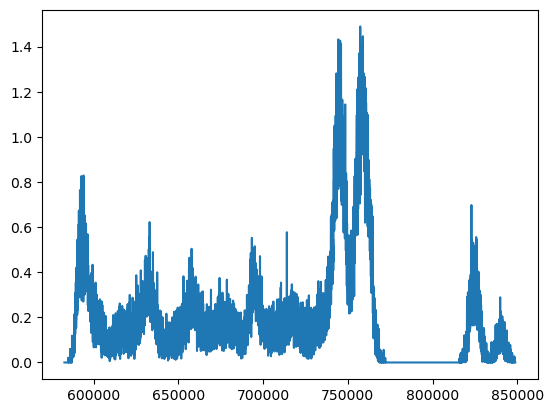

In [41]:
event, sensor = 0, 202
event_signal = signal_s2.loc[signal_s2.event_id == event].copy()
plt.plot(event_signal.time, event_signal[f'sensor{sensor}_s2'])

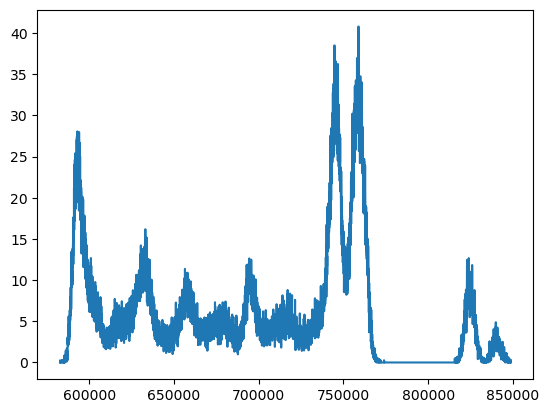

In [42]:
total_signal = np.array(signal_s2.loc[signal_s2.event_id == event].filter(like='sensor')).sum(axis = 1)
plt.plot(event_signal.time, total_signal)